## Análise da situação acadêmica dos alunos da rede pública de ensino da cidade do Recife nos anos de: 2019, 2021 e 2022.

#### APRESENTAÇÃO DA BASE DE DADOS E OS CRITÉRIOS DE SELEÇÃO

No Brasil, um dos setores mais impactados pela pandemia da COVID foi a Educação. Conforme Dados do Censo Escolar(2020), apenas 53% das escolas públicas conseguiram manter o seu calendário letivo original de 2020.

Diante desse fato, escolhemos analisar a situação acadêmica dos alunos do 9º ano, da rede pública da cidade do Recife, nos anos de 2019, 2021 e 2022. Fazendo um comparativo analítico da situação final dos alunos antes e pós pandemia. Não escolhemos o ano de 2020, pois foi o ano da pandemia e a situação final dos alunos do 9º ano foi "Renovação sem situação final definida". Houve uma determinação do Ministério da Educação, que no ano de 2020, os alunos de redes públicas não deveriam ser reprovados, inviabilizando a nossa análise para esse ano

A Secretaria de Educação do Recife possui uma rede de ensino com 320 unidades escolares, sendo 231 escolas; 47 creches; e 42 creches escola. Além disso, a rede contabiliza cerca de 92 mil estudantes e mais de 5.400 professores. É de responsabilidade da Secretaria a educação infantil, para alunos de até 5 anos, o ensino fundamental, do 1º ao 9º ano, o ensino profissionalizante e a Educação de Jovens e Adultos (EJA). Além de promover a inclusão de pessoas com necessidades especiais em todos os níveis de ensino.

Nossa análise deseja saber: 
- se houve um aumento na quantidade de alunos por ano; 
- se houve um aumento ou diminuição na aprovação por ano;
- se houve um aumento ou diminuição na desistência e reprovação por ano.



Os dados foram retirados do portal "Dados Abertos da Prefeitura de Recife". http://dados.recife.pe.gov.br/

Resultado Final dos Alunos - 2019 / Dados atualizados pela última vez: 5/Março/2020

Resultado Final dos Alunos - 2021 / Dados atualizados pela última vez: 11/Julho/2023

Resultado Final dos Alunos - 2022 / Dados atualizados pela última vez: 11/Julho/2023



#### TRATAMENTO DA BASE

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [50]:
anos = [2019, 2021, 2022]

dados_df = pd.DataFrame()

for ano in anos:
    df = pd.read_csv(f'situacaofinalalunos{ano}.csv', sep=';')
    da = df.loc[(df['anoensino'] == '9º ANO'), ['ano', 'nescolnome', 'ebairrnome', 'cescolrpae', 'anoensino', 'nturesnome', 'mat', 'alunosexo', 'situ', 'esitaldesc']]
    
    dados_df = pd.concat([dados_df, da], ignore_index=True)

dados_df.to_csv('tabela9ano.csv', sep=';', index=False, header=True)

In [51]:
df9ano = pd.read_csv('tabela9ano.csv', sep = ';')
df9ano

,ano,nescolnome,ebairrnome,cescolrpae,anoensino,nturesnome,mat,alunosexo,situ,esitaldesc
0,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,15755274,M,TA,TR DUR ANO P/REDE
1,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,14286068,F,RN,RENV S/SIT FINAL DEF
2,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,5035864,M,RN,RENV S/SIT FINAL DEF
3,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,12059293,M,RN,RENV S/SIT FINAL DEF
4,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,13165470,M,RN,RENV S/SIT FINAL DEF
...,...,...,...,...,...,...,...,...,...,...
8362,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14306131,F,AP,APROVADO
8363,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14328186,M,AP,APROVADO
8364,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15034879,F,AP,APROVADO
8365,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15073009,F,AP,APROVADO


In [52]:
# Renomeando as colunas

df9ano.rename(columns={'ano':'ANO', 'nescolnome':'ESCOLA', 'ebairrnome':'BAIRRO',
        'cescolrpae':'RPA', 'anoensino':'SÉRIE', 'nturesnome':'TURNO',
        'mat':'MATRÍCULA', 'alunosexo':'SEXO','situ':'SITUAÇÃO', 'esitaldesc':'RESULTADO'}, inplace = True)
df9ano

,ANO,ESCOLA,BAIRRO,RPA,SÉRIE,TURNO,MATRÍCULA,SEXO,SITUAÇÃO,RESULTADO
0,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,15755274,M,TA,TR DUR ANO P/REDE
1,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,14286068,F,RN,RENV S/SIT FINAL DEF
2,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,5035864,M,RN,RENV S/SIT FINAL DEF
3,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,12059293,M,RN,RENV S/SIT FINAL DEF
4,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,13165470,M,RN,RENV S/SIT FINAL DEF
...,...,...,...,...,...,...,...,...,...,...
8362,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14306131,F,AP,APROVADO
8363,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14328186,M,AP,APROVADO
8364,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15034879,F,AP,APROVADO
8365,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15073009,F,AP,APROVADO


In [53]:
df9ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ANO        8367 non-null   int64 
 1   ESCOLA     8367 non-null   object
 2   BAIRRO     8367 non-null   object
 3   RPA        8367 non-null   int64 
 4   SÉRIE      8367 non-null   object
 5   TURNO      8367 non-null   object
 6   MATRÍCULA  8367 non-null   int64 
 7   SEXO       8367 non-null   object
 8   SITUAÇÃO   8367 non-null   object
 9   RESULTADO  8367 non-null   object
dtypes: int64(3), object(7)
memory usage: 653.8+ KB


In [54]:
df9ano['ANO'].value_counts()

ANO
2022    3128
2021    2819
2019    2420
Name: count, dtype: int64

In [55]:
df9ano.drop(columns=['SITUAÇÃO'], inplace = True)

In [56]:
df9ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ANO        8367 non-null   int64 
 1   ESCOLA     8367 non-null   object
 2   BAIRRO     8367 non-null   object
 3   RPA        8367 non-null   int64 
 4   SÉRIE      8367 non-null   object
 5   TURNO      8367 non-null   object
 6   MATRÍCULA  8367 non-null   int64 
 7   SEXO       8367 non-null   object
 8   RESULTADO  8367 non-null   object
dtypes: int64(3), object(6)
memory usage: 588.4+ KB


In [57]:
df9ano.isnull().sum()

ANO          0
ESCOLA       0
BAIRRO       0
RPA          0
SÉRIE        0
TURNO        0
MATRÍCULA    0
SEXO         0
RESULTADO    0
dtype: int64

In [58]:
df9ano['ANO'].unique()

array([2019, 2021, 2022], dtype=int64)

In [59]:
df9ano['RESULTADO'].value_counts()


RESULTADO
APROVADO                5889
RENV S/SIT FINAL DEF    1848
TR DUR ANO FORA REDE     433
TR DUR ANO P/REDE        112
RETIDO                    30
DESIST/DEIXOU FREQUE      27
REMANEJADO                20
REPROV P/  FALTA           4
FALECIDO                   4
Name: count, dtype: int64

#### ANÁLISE DOS DADOS E APRESENTAÇÃO DOS GRÁFICOS

#### Quantidade de Alunos por Ano

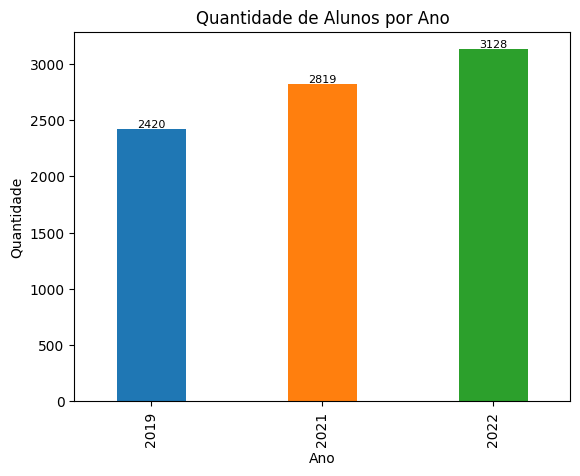

In [60]:
contagem_por_ano2 = df9ano.groupby(['ANO']).ANO.count().sort_values()

ax2 = contagem_por_ano2.plot(kind='bar', width=0.4, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])

for container2 in ax2.containers:
    ax2.bar_label(container2, fmt='%d', label_type='edge', fontsize=8)

plt.title('Quantidade de Alunos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.show()

#### Curva de Crescimento da Quantidade de Alunos por Ano

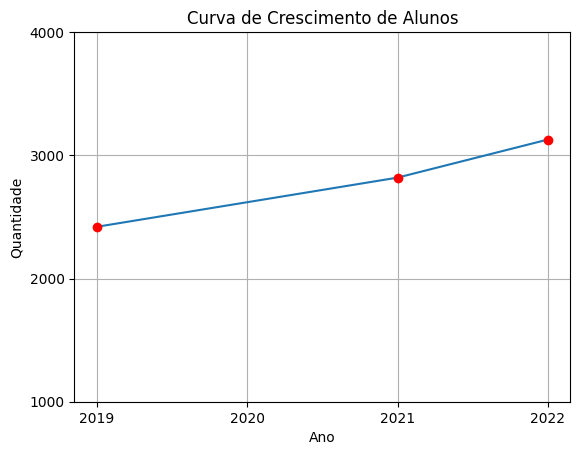

In [61]:
crescimento_num_alunos = df9ano.groupby(['ANO']).size()


ax = crescimento_num_alunos.plot()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.title('Curva de Crescimento de Alunos')
plt.grid(True)
plt.scatter(crescimento_num_alunos.index, crescimento_num_alunos.values,
            color="red", zorder=10)
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks([2019, 2020, 2021, 2022])
plt.yticks([1000, 2000, 3000, 4000])


plt.show()

#### Quantidade de Alunos por Ano e Sexo 

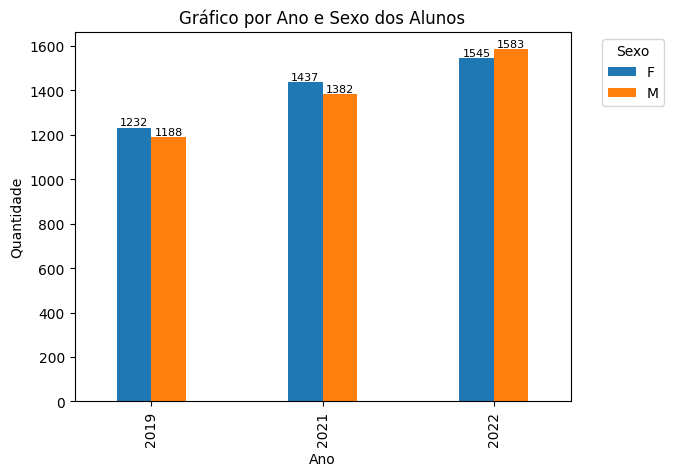

In [62]:
resultados_por_ano = df9ano.groupby(['ANO', 'SEXO']).size().unstack()


ax = resultados_por_ano.plot(kind='bar', width=0.4)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.title('Gráfico por Ano e Sexo dos Alunos')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Resultado Acadêmico por Ano 

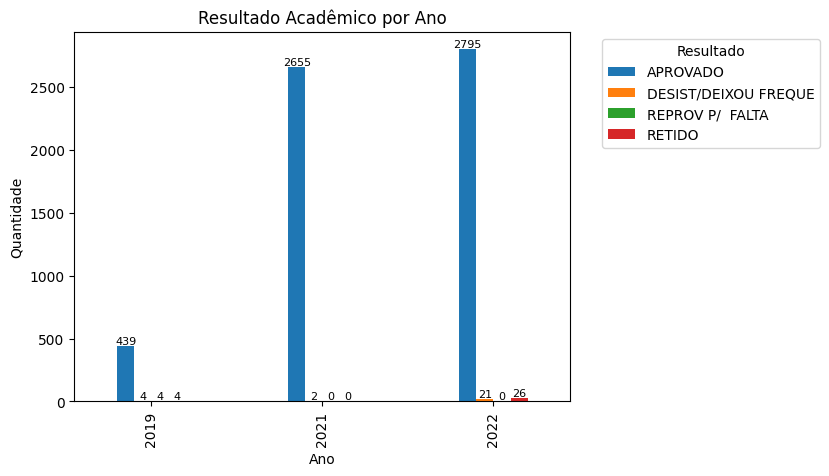

In [63]:

resultados_filtrados = df9ano[df9ano['RESULTADO'].isin(['APROVADO', 'RETIDO', 'REPROV P/  FALTA', 'DESIST/DEIXOU FREQUE'])]


resultados_por_ano = resultados_filtrados.groupby(['ANO', 'RESULTADO']).size().unstack()


ax = resultados_por_ano.plot(kind='bar', width=0.4)


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)


plt.title('Resultado Acadêmico por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend(title='Resultado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


DESCRITIVO DOS RESULTADOS

- APROVADO (quantidade de alunos aprovados naquele ano)
- DESIST/DEIXOU FREQUE (quantidade de alunos que desistiram ou deixaram de frequentar a escola naquele ano)
- REPROV P/ FALTA (quantidade de alunos que foram reprovados naquele ano)
- RETIDO (quantidade de alunos que têm pendências em alguma disciplina, naquele ano)

#### Resultado Acadêmico por Ano (continuação)

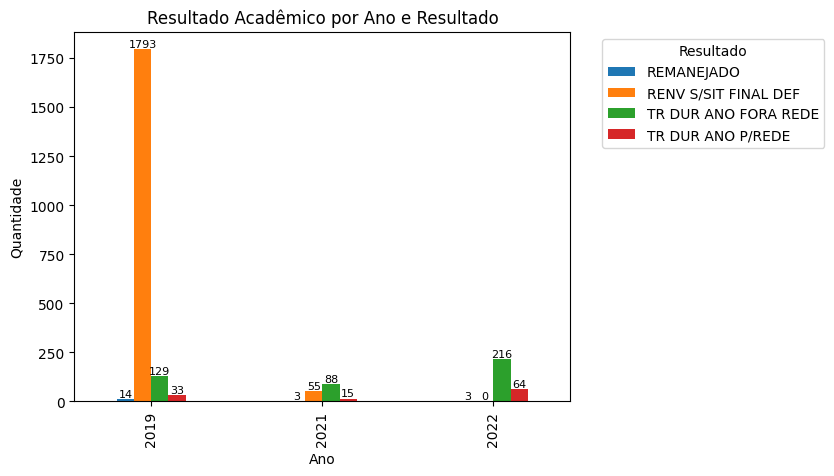

In [64]:
resultados_filtrados = df9ano[df9ano['RESULTADO'].isin(['TR DUR ANO FORA REDE', 'TR DUR ANO P/REDE', 'REMANEJADO', 'RENV S/SIT FINAL DEF'])]

resultados_por_ano = resultados_filtrados.groupby(['ANO', 'RESULTADO']).size().unstack()

ax = resultados_por_ano.plot(kind='bar', width=0.4)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.title('Resultado Acadêmico por Ano e Resultado')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend(title='Resultado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

DESCRITIVO DOS RESULTADOS

- REMANEJADO (quantidade de alunos que foram remanejados naquele ano)
- RENV S/SIT FINAL DEF (quantidade de alunos com renovação sem situação final definida, naquele ano)
- TR DUR ANO FORA REDE (quantidade de alunos que foram transferidos para fora da rede municipal, naquele ano)
- TR DUR ANO P/REDE (quantidade de alunos que foram transferidos para a da rede municipal, naquele ano)

#### Curva de Crescimento dos 10 Bairros Mais Representativos em Número de Alunos

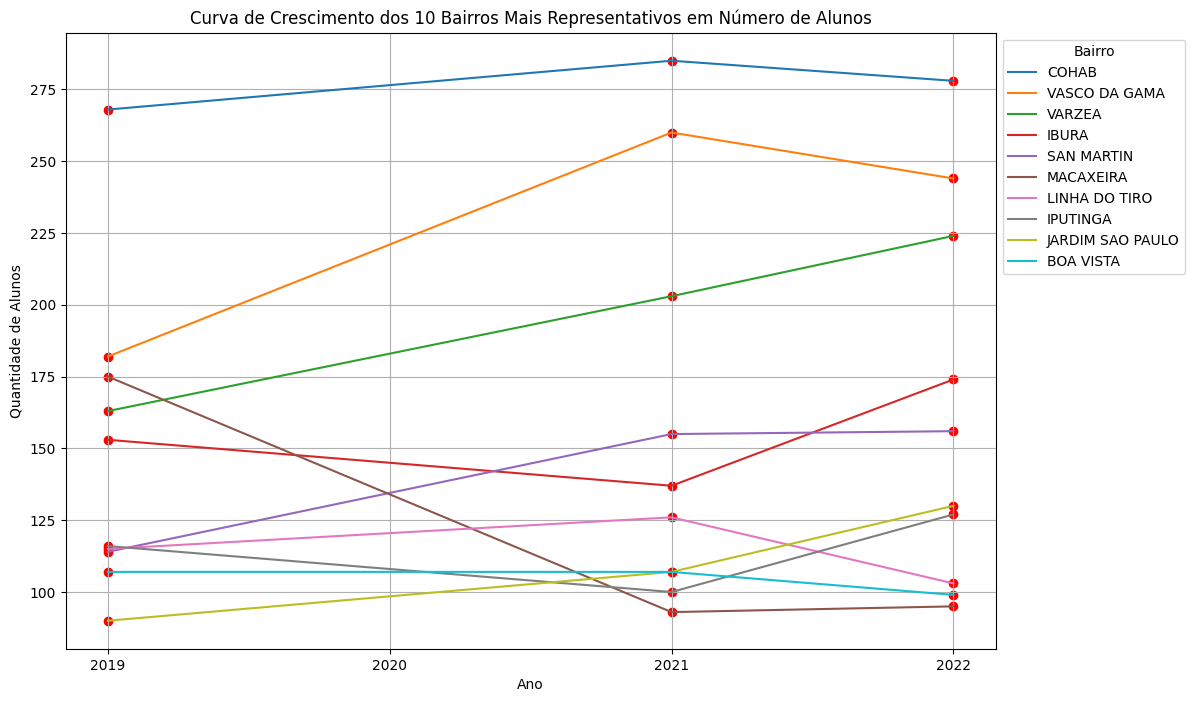

In [65]:
contagem_matriculas_bairros = df9ano.groupby(['ANO', 'BAIRRO'])['MATRÍCULA'].count().unstack()

total_matriculas_bairros = contagem_matriculas_bairros.sum(axis=0)

top10_bairros = total_matriculas_bairros.nlargest(10).index

plt.figure(figsize=(12, 8))

for bairro in top10_bairros:
    plt.plot(contagem_matriculas_bairros.index, contagem_matriculas_bairros[bairro], label=bairro)
    plt.scatter(contagem_matriculas_bairros.index, contagem_matriculas_bairros[bairro], color='red')


plt.xlabel('Ano')
plt.ylabel('Quantidade de Alunos')
plt.grid(True)
plt.xticks([2019, 2020, 2021, 2022])
plt.title('Curva de Crescimento dos 10 Bairros Mais Representativos em Número de Alunos')
plt.legend(title='Bairro', bbox_to_anchor=(1, 1))


plt.show()

#### CONCLUSÃO

- Nossa primeira questão da análise foi: se houve um aumento na quantidade de alunos por ano?

Vimos que: 

De 2019 para 2021 o aumento foi maior que 16% (399 alunos)
De 2021 para 2022 o aumento foi maior que 10% (309 alunos)
O aumento ao longo dos 3 anos foi de 29% (708 alunos)
Então sugerimos a criação de novas unidades de escolas, para suportar esse crescimento constante.



- Nossa segunda questão da análise foi: se houve um aumento ou diminuição na aprovação por ano.

Nesse ponto, vimos que existiu uma situação em 2019, que não se repetiu em 2021 e 2022, e não temos como analisar de forma aprofundada o que aconteceu, porque não temos acesso aos critérios utilizados. 

Vimos que em 2019 só houve 439 aprovados, bem diferente de 2021 com 2655 e 2022 com 2795. Não sabemos se após a pandemia a Secretaria de Educação mudou a forma de avaliação dos alunos ou se tem outra situação que não temos acesso. Mas identificamos que essa mudança aconteceu após a pandemia e com isso, vimos que houve um aumento na aprovação dos alunos.

O contraponto desse indicador, foi que em 2019 houve 1793 alunos com “renovação sem situação final definida”. Totalmente diferente de 2021 com 55 e 2022 com 0. 

- Nossa última questão da análise foi: se houve um aumento ou diminuição na desistência e reprovação por ano.

Em 2019 houve 4 desistências/deixou de frequentar e 4 reprovações por falta. Já em 2021 houve só 2 desistências/deixou de frequentar e não houve nenhuma reprovação por falta. E em 2022 houve 21 desistências/deixou de frequentar e novamente, nenhuma reprovação por falta.

Então concluímos que houve um aumento com relação a desistências/deixou de frequentar, no comparativo em entre antes da pandemia e pós pandemia. E que não houve reprovações por falta, no pós pandemia. Não temos acesso a informação se houve alguma mudança na política de avaliação dos alunos, no pós pandemia.


E para finalizar, fizemos a análise dos 10 bairros do Recife onde houve um aumento mais representativo em números de alunos. E esses são bairros onde estão as duas médias mais baixa de rendas familiares, exceto o Bairro da Boa Vista que está na faixa da segunda melhor média.


